<a href="https://colab.research.google.com/github/NikolaiZolotykh/MachineLearningCourse/blob/master/20.01.%20Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Минималистический пример

In [2]:
from sklearn import datasets

N = 2500
X, y = datasets.make_blobs(n_samples = N, centers = 3, random_state = 1)

In [3]:
colors = np.array(['blue', 'red', 'green', 'magenta', 'yellow', 'cyan', 'gray', 'navy'])

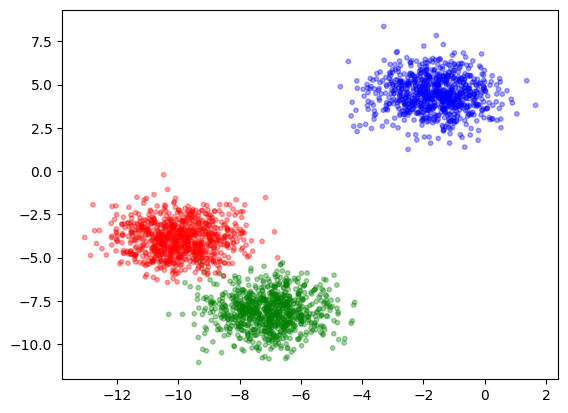

In [4]:
plt.scatter(X[:, 0], X[:, 1], color = colors[y], s = 10, alpha = 0.35);

In [5]:
from sklearn import cluster
kmeans = cluster.MiniBatchKMeans(n_clusters = 5)
kmeans.fit(X)
y_pred = kmeans.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
#kmeans.fit(X)
#y_pred = kmeans.labels_

In [7]:
#kmeans.fit_predict(X)

In [8]:
kmeans.cluster_centers_

array([[-7.88435049, -8.17636312],
       [-0.99063496,  4.62986587],
       [-9.98770519, -3.97111335],
       [-6.31390331, -8.07053956],
       [-2.51035868,  4.17304553]])

In [9]:
y_pred

array([4, 4, 2, ..., 1, 3, 2], dtype=int32)

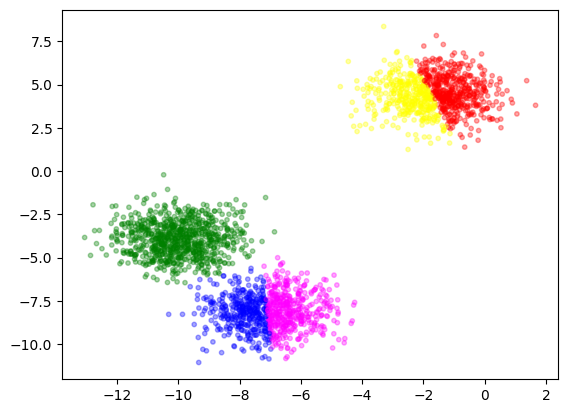

In [10]:
plt.scatter(X[:, 0], X[:, 1], color = colors[y_pred], s = 10, alpha = 0.35);

# Разные методы

In [11]:
np.random.seed(1)

N = 2500
circles, _ = datasets.make_circles(n_samples = N, factor = .5, noise = .05)
moons, _   = datasets.make_moons(n_samples = N, noise = .05)
blobs, _   = datasets.make_blobs(n_samples = N, random_state = 1)
s_curve    = datasets.make_s_curve(n_samples = N, noise = .05)
s_curve    = np.vstack((s_curve[0][:, 0], s_curve[0][:, 2])).T
swiss_roll = datasets.make_swiss_roll(n_samples = N, noise = .05)
swiss_roll = np.vstack((swiss_roll[0][:,0], swiss_roll[0][:,2])).T

data_samples = [(circles, 2), (moons, 2), (blobs, 3), (s_curve, 4), (swiss_roll, 4)]

In [12]:
from sklearn import metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:282: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:552: UserWarning: the numb

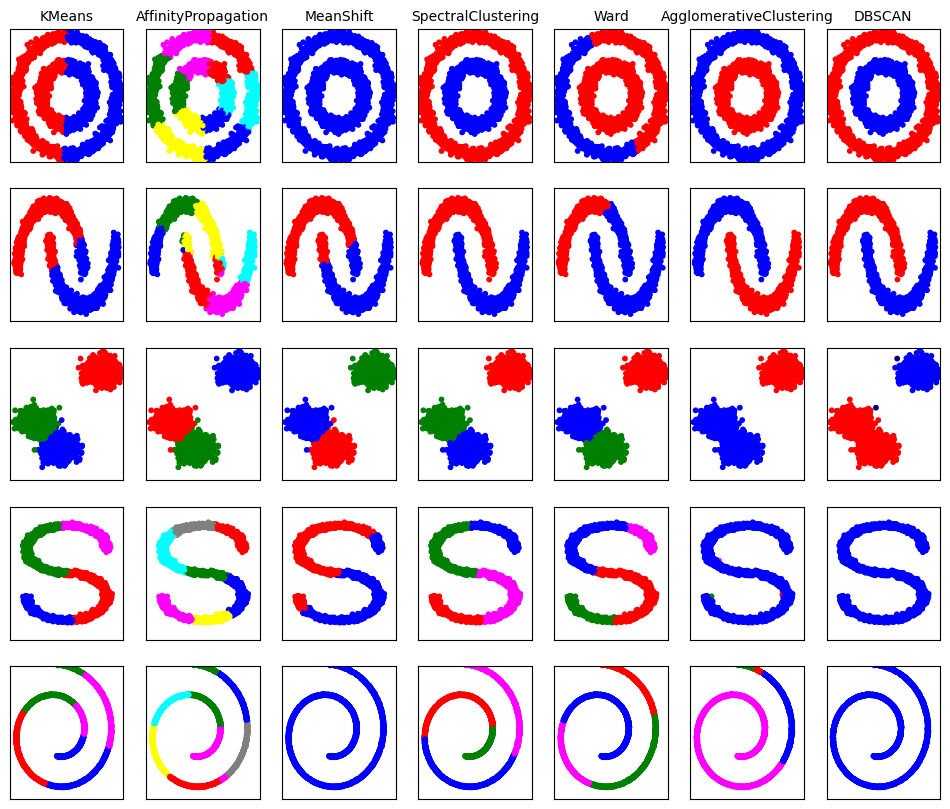

In [13]:
plt.figure(figsize = (12, 10))
plot_num = 1

for X, K in data_samples:

    X = StandardScaler().fit_transform(X)

    bandwidth = cluster.estimate_bandwidth(X, quantile = 0.3)

    connectivity = kneighbors_graph(X, n_neighbors = 10, include_self = True)
    #connectivity = .5*(connectivity + connectivity.T)

    kmeans    = cluster.MiniBatchKMeans(n_clusters = K)
    affinity_propagation = cluster.AffinityPropagation(damping = .9, preference = -200)
    meanshift = cluster.MeanShift(bandwidth = bandwidth, bin_seeding = True)
    spectral  = cluster.SpectralClustering(n_clusters = K,
                                           eigen_solver = 'arpack',
                                           affinity = 'nearest_neighbors')
    ward      = cluster.AgglomerativeClustering(n_clusters = K,
                                                linkage = 'ward', 
                                                connectivity = connectivity)
    average_linkage = cluster.AgglomerativeClustering(n_clusters = K,
                                                      linkage = 'average',
                                                      affinity ='cityblock', 
                                                      connectivity = connectivity)
    dbscan = cluster.DBSCAN(eps = .2)

    clustering_algs = [
        ('KMeans', kmeans),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', meanshift),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan)
    ]

    for alg_name, alg in clustering_algs:
        alg.fit(X)
        y_pred = alg.labels_

        plt.subplot(len(data_samples), len(clustering_algs), plot_num)
        if plot_num <= len(clustering_algs):
            plt.title(alg_name, size = 10)
        plot_num += 1
        plt.scatter(X[:, 0], X[:, 1], color = colors[y_pred], s = 10)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())            

In [14]:
from sklearn.mixture import GMM
gmm = GMM(n_components = 3)
gmm.fit(blobs)
y_pred = gmm.predict(blobs)

ImportError: ignored

In [ ]:
plt.scatter(blobs[:, 0], blobs[:, 1], color = colors[y_pred], s = 10)


In [ ]:
X, _ = datasets.make_blobs(n_samples = N, 
                           centers = ((0, 0), (3.5, 0)),
                           random_state = 1)

In [ ]:
gmm = GMM(n_components = 2)
gmm.fit(X)
y_pred = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], color = colors[y_pred], s = 10, alpha = 0.2)